VEMULA KASINATH

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.9 MB/s eta 0:00:00


In [6]:
df = pd.read_csv("/content/Housing.csv")

In [7]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
285,4235000,6650,3,1,2,yes,yes,no,no,no,0,no,semi-furnished
273,4340000,3500,4,1,2,yes,no,no,no,no,2,no,furnished
520,2450000,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished
365,3703000,5450,2,1,1,yes,no,no,no,no,0,no,furnished
214,4865000,4350,2,1,1,yes,no,yes,no,no,0,no,unfurnished
306,4165000,4840,3,1,2,yes,no,no,no,no,1,no,semi-furnished
323,4025000,5400,3,1,1,yes,no,no,no,no,3,no,semi-furnished
221,4767000,3420,4,2,2,yes,no,no,no,no,0,no,semi-furnished
357,3773000,6930,4,1,2,no,no,no,no,no,1,no,furnished
134,5803000,7000,3,1,1,yes,no,yes,no,no,2,yes,semi-furnished


In [8]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.shape # data shape

(545, 13)

In [10]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.duplicated().sum() # duplicate values check

0

In [13]:
df.corr() # correlations between data/

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [14]:
data=df.copy()

Data Visualization 📊

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

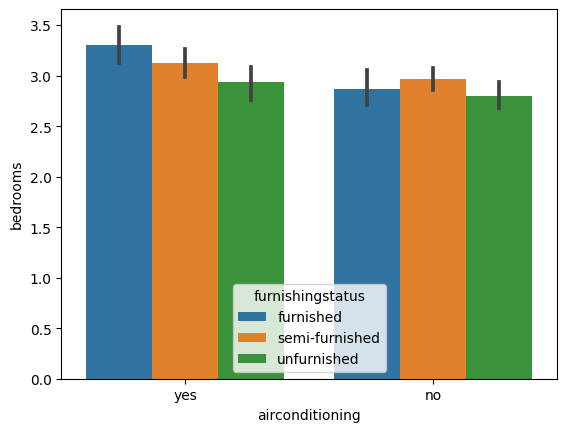

In [15]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

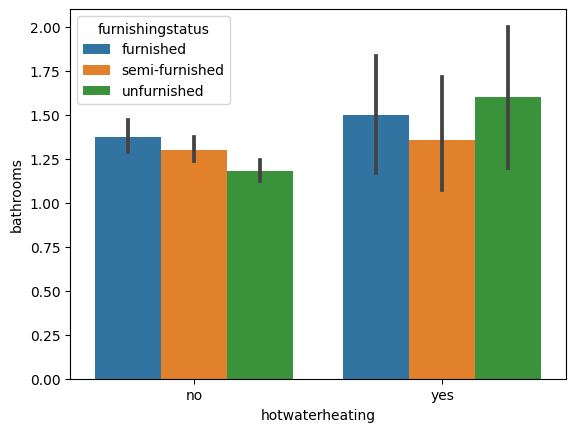

In [16]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

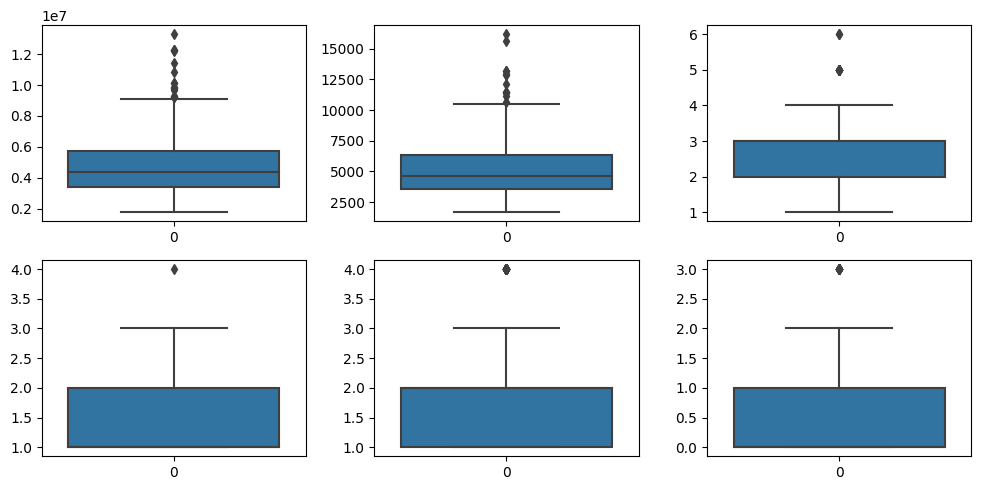

In [17]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])
plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x791ec757a380>,
 'caps': [<matplotlib.lines.Line2D at 0x791ec757a7a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x791ec757a0e0>],
 'medians': [<matplotlib.lines.Line2D at 0x791ec757ace0>],
 'fliers': [<matplotlib.lines.Line2D at 0x791ec757af80>],
 'means': []}

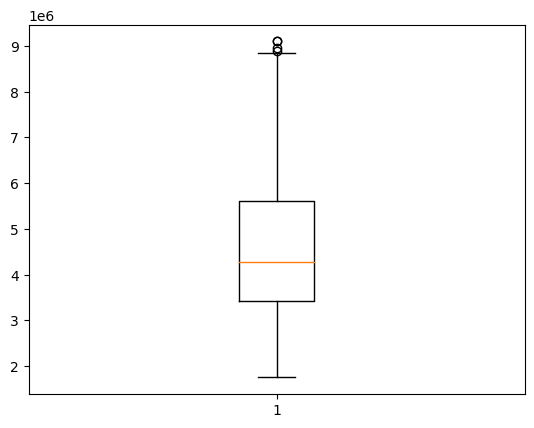

In [18]:
# Dealing with outliers in price
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x791ec75f1f30>,
 'caps': [<matplotlib.lines.Line2D at 0x791ec756f130>,
 'boxes': [<matplotlib.lines.Line2D at 0x791ec75f1c90>],
 'medians': [<matplotlib.lines.Line2D at 0x791ec75f21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x791ec75f2470>],
 'means': []}

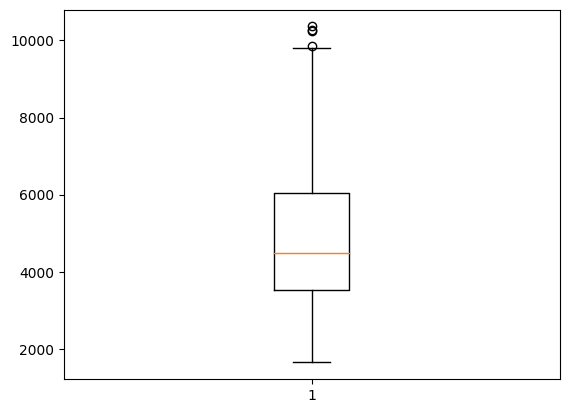

In [19]:
# Dealing with outliers in srea

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

<Axes: xlabel='furnishingstatus', ylabel='price'>

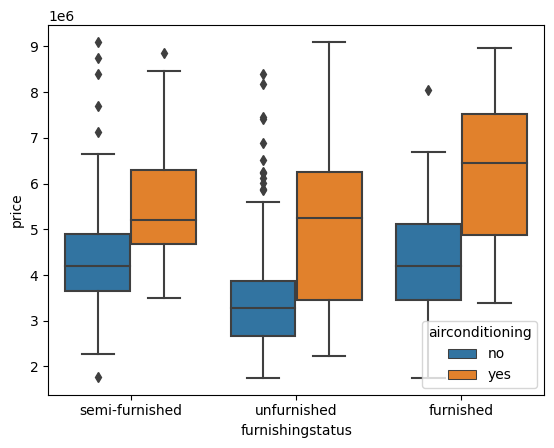

In [20]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='bedrooms', ylabel='Density'>

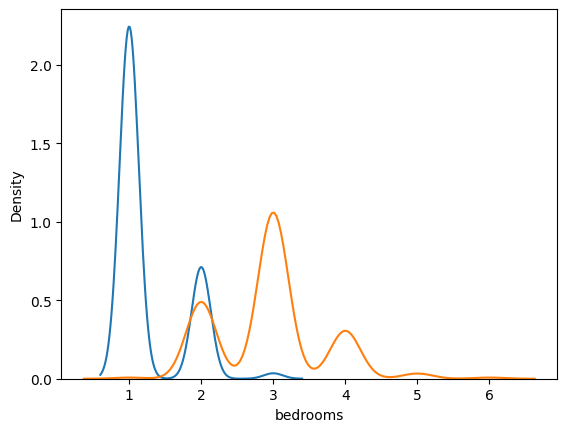

In [21]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

<Axes: xlabel='parking', ylabel='Density'>

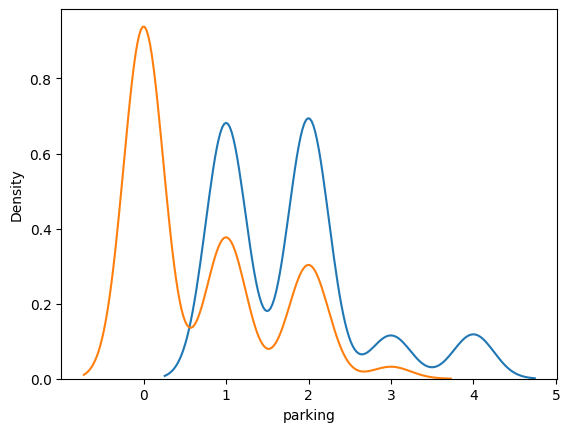

In [22]:
sns.distplot(df["stories"],hist=False)
sns.distplot(df["parking"],hist=False)

<Axes: >

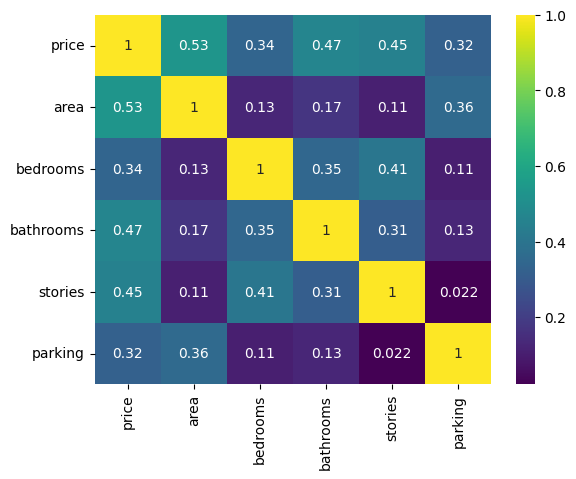

In [23]:
sns.heatmap(df.corr(), cmap='viridis',annot=True)

<Axes: xlabel='area', ylabel='price'>

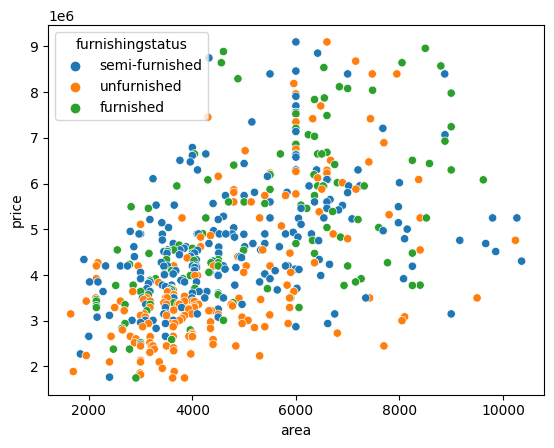

In [24]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

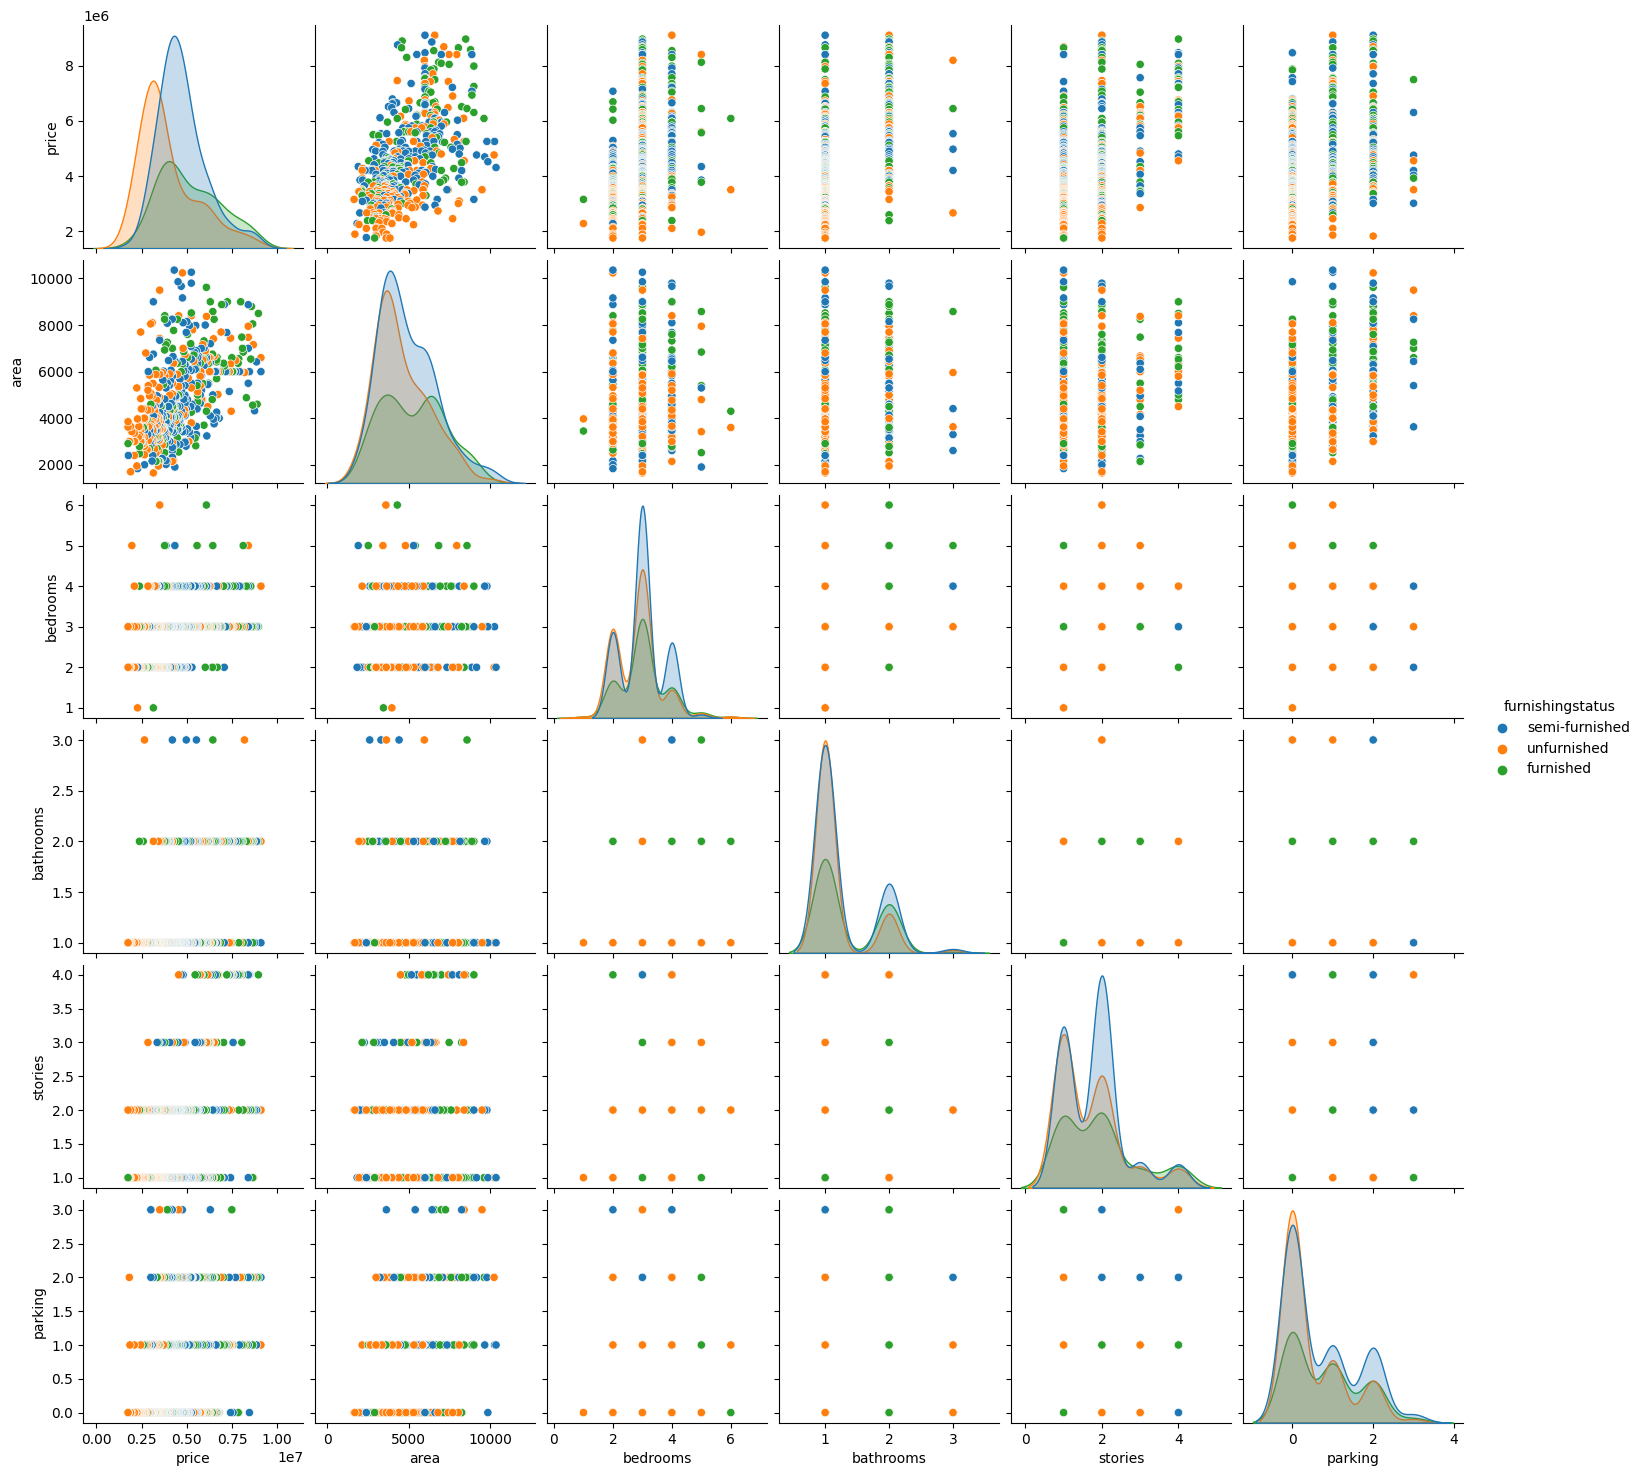

In [25]:
sns.pairplot(df,hue="furnishingstatus")

In [26]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


In [27]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),
    'XGRF Regressor' : xgb.XGBRFRegressor(),
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
    'LGBM Reg' : LGBMRegressor(),
    'Cat Boost' : CatBoostRegressor()
}

In [30]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

Learning rate set to 0.035153
0:	learn: 1743336.7701314	total: 48.6ms	remaining: 48.6s
1:	learn: 1714060.0030864	total: 49.9ms	remaining: 24.9s
2:	learn: 1690709.4583202	total: 52.1ms	remaining: 17.3s
3:	learn: 1663659.7134220	total: 60ms	remaining: 14.9s
4:	learn: 1637187.2177462	total: 61.6ms	remaining: 12.3s
5:	learn: 1609904.4800750	total: 63.1ms	remaining: 10.5s
6:	learn: 1584473.7853580	total: 65.7ms	remaining: 9.32s
7:	learn: 1561474.3436137	total: 68.6ms	remaining: 8.5s
8:	learn: 1538194.2956306	total: 71.2ms	remaining: 7.84s
9:	learn: 1518629.5975152	total: 77.5ms	remaining: 7.67s
10:	learn: 1497158.3750672	total: 78.9ms	remaining: 7.09s
11:	learn: 1475780.8977487	total: 80.1ms	remaining: 6.6s
12:	learn: 1459072.9962560	total: 80.5ms	remaining: 6.11s
13:	learn: 1440179.2237151	total: 81.7ms	remaining: 5.75s
14:	learn: 1423259.9139846	total: 82.6ms	remaining: 5.42s
15:	learn: 1405035.2467784	total: 83.5ms	remaining: 5.13s
16:	learn: 1389390.6917344	total: 84.4ms	remaining: 4.88

Results for Random Forest Regressor : 
Mean Square Erroe : 1872734882236.9211
R2 Score : 0.5651266245799871


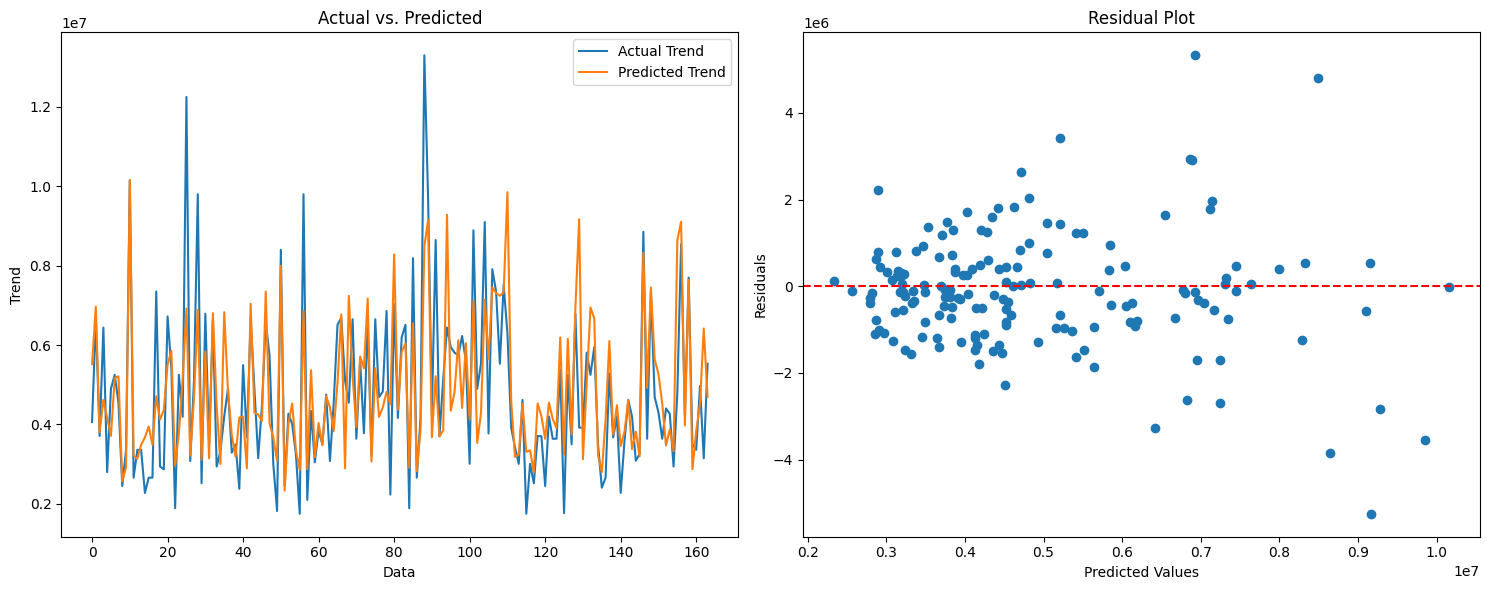

Results for Gradient Boost Regressor : 
Mean Square Erroe : 1613157544684.4539
R2 Score : 0.6254038555082357


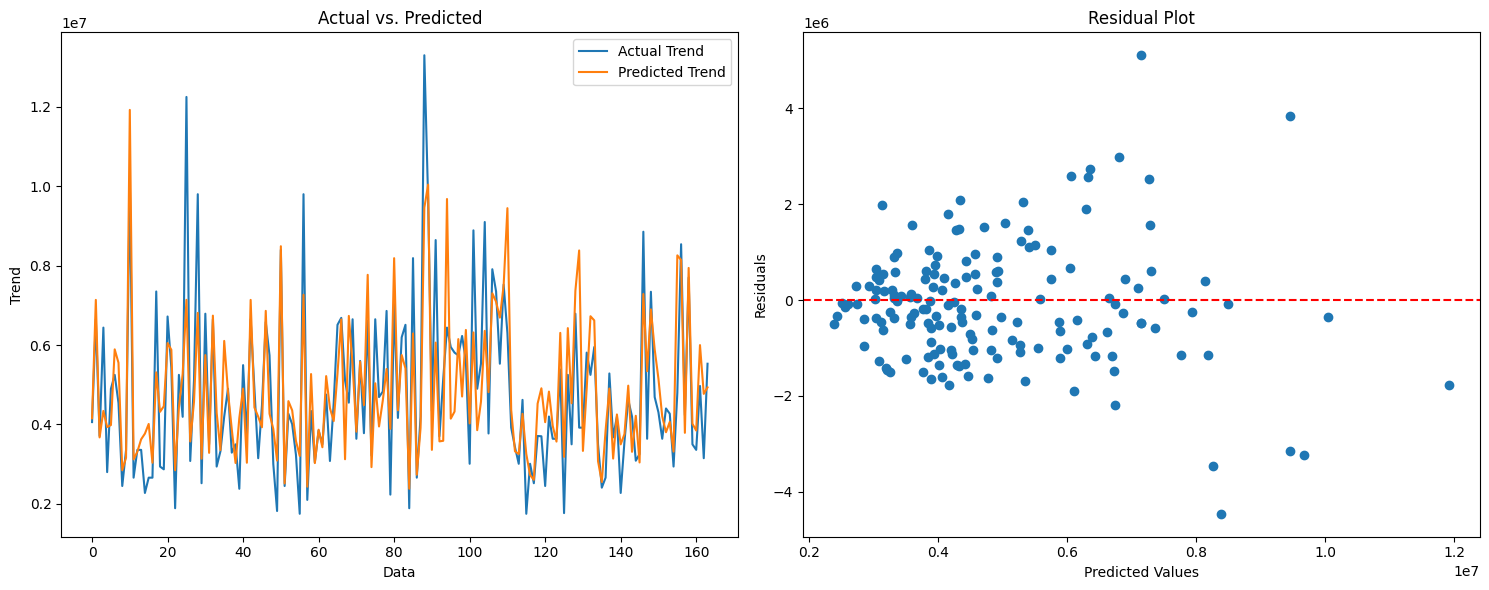

Results for XGBoost : 
Mean Square Erroe : 1655928196173.54
R2 Score : 0.6154719544375646


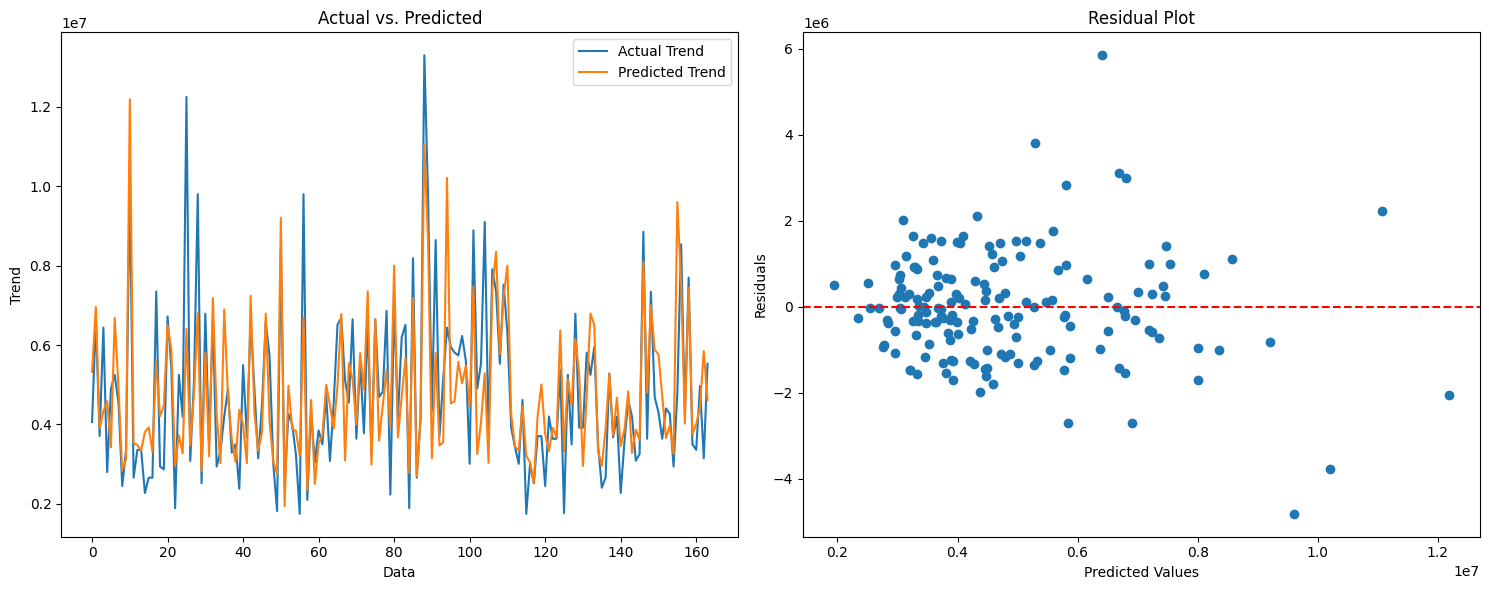

Results for XGRF Regressor : 
Mean Square Erroe : 2081873986786.9395
R2 Score : 0.5165618067882931


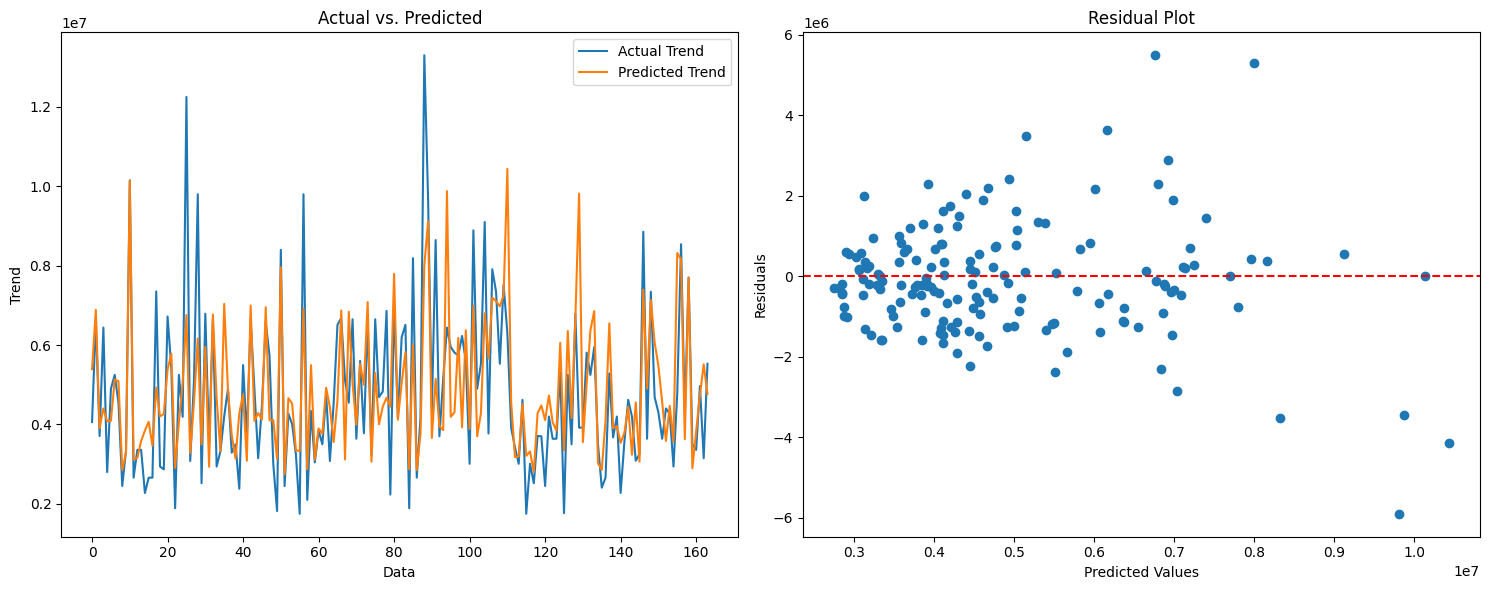

Results for Support Vector regressor : 
Mean Square Erroe : 4462165325262.905
R2 Score : -0.03617277335133684


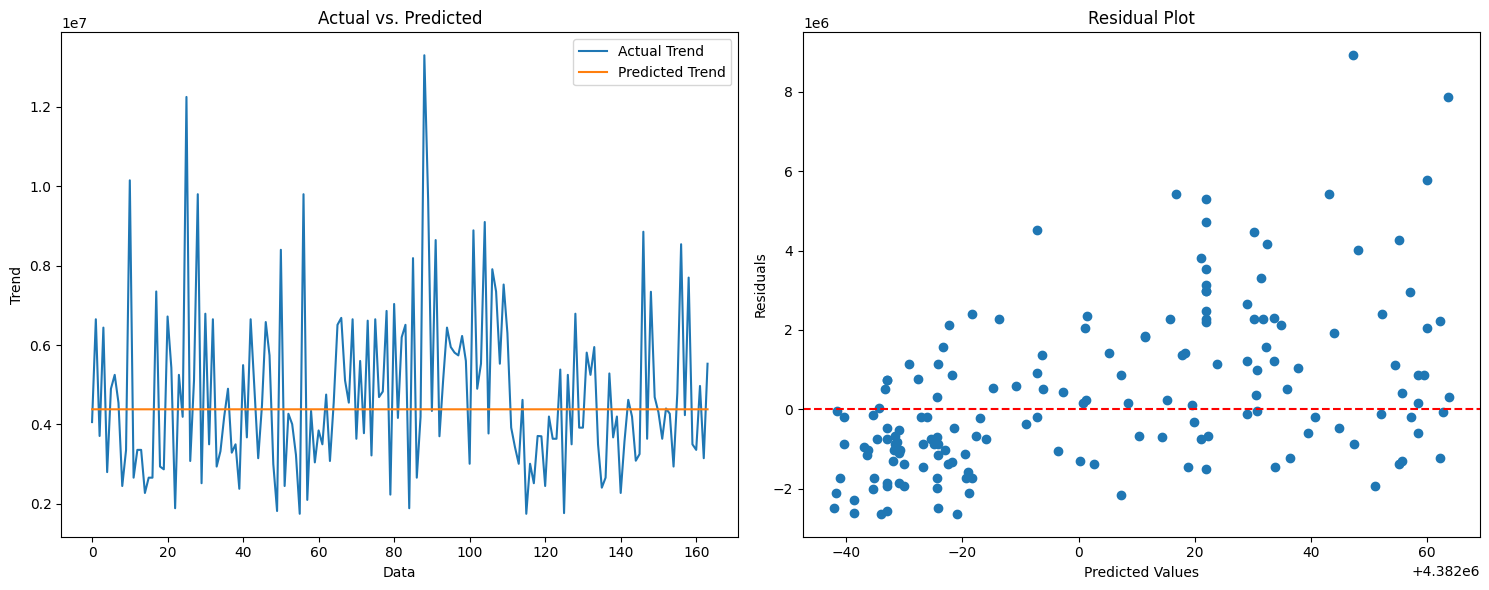

Results for Lasso Reg : 
Mean Square Erroe : 1523021266688.3394
R2 Score : 0.6463346705594011


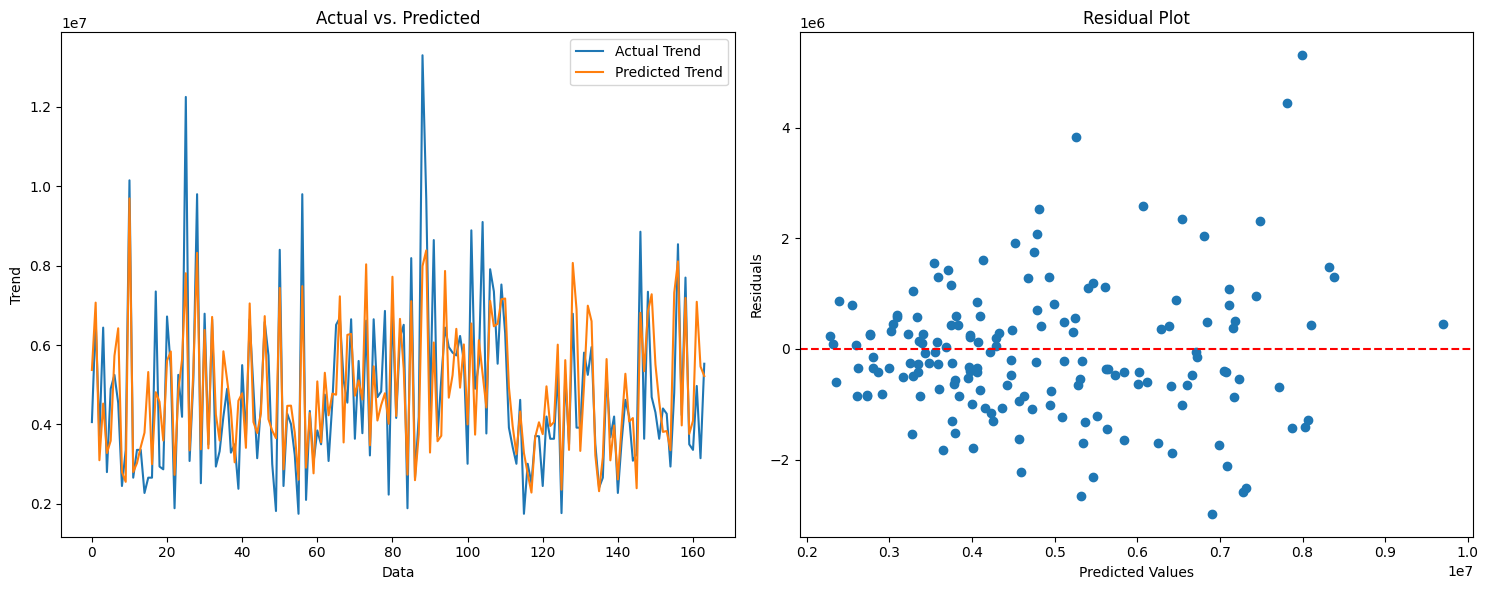

Results for Ridge Reg : 
Mean Square Erroe : 1525354840593.37
R2 Score : 0.6457927843743898


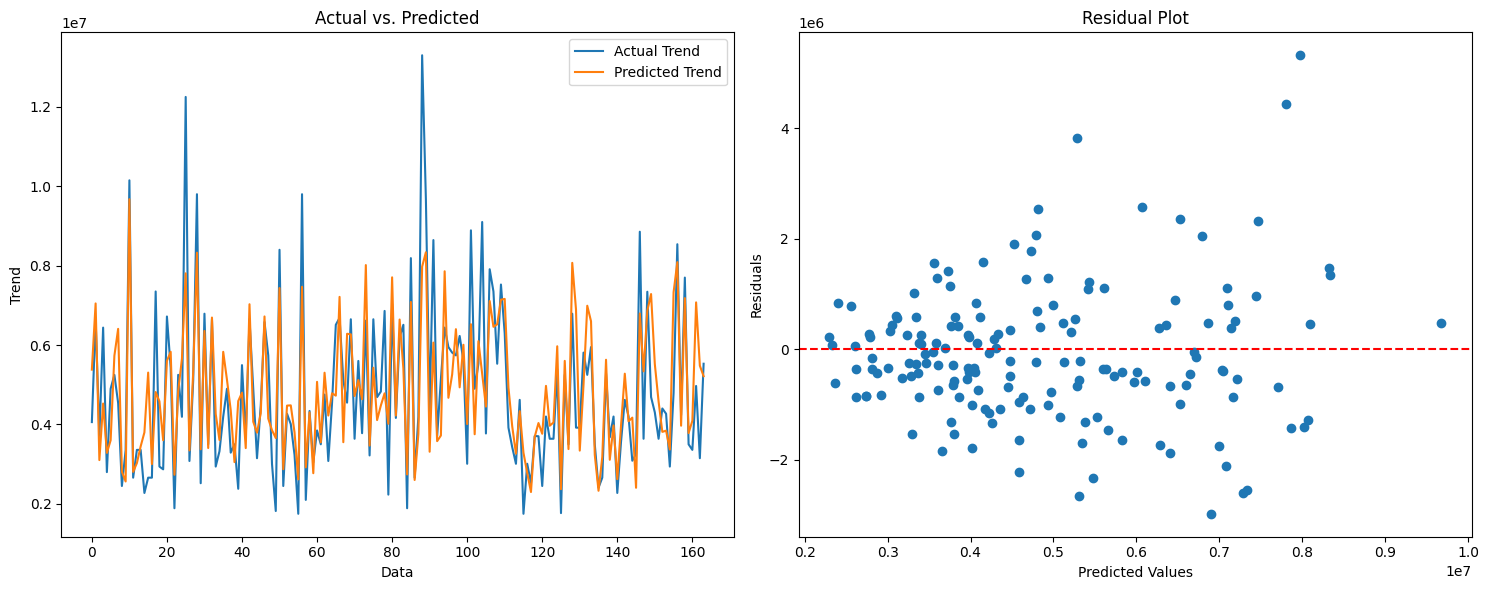

Results for LGBM Reg : 
Mean Square Erroe : 1602977666834.8694
R2 Score : 0.6277677554301107


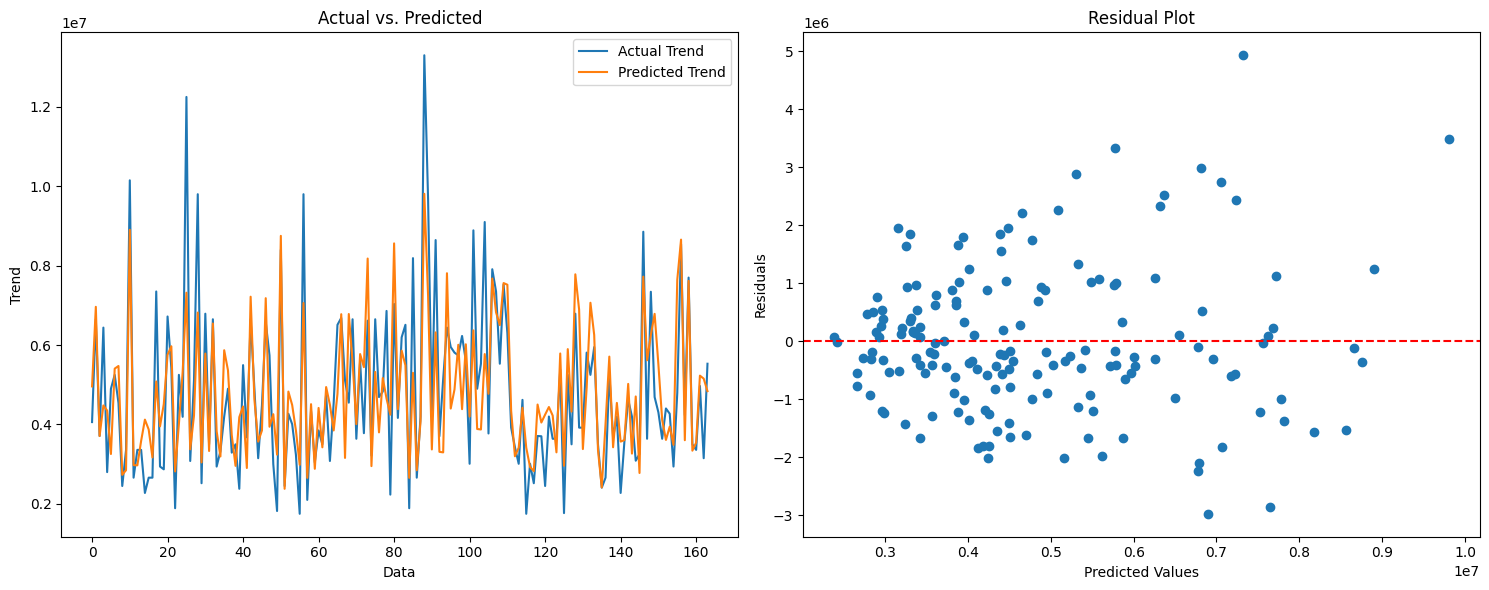

Results for Cat Boost : 
Mean Square Erroe : 1532351539182.4873
R2 Score : 0.6441680600414872


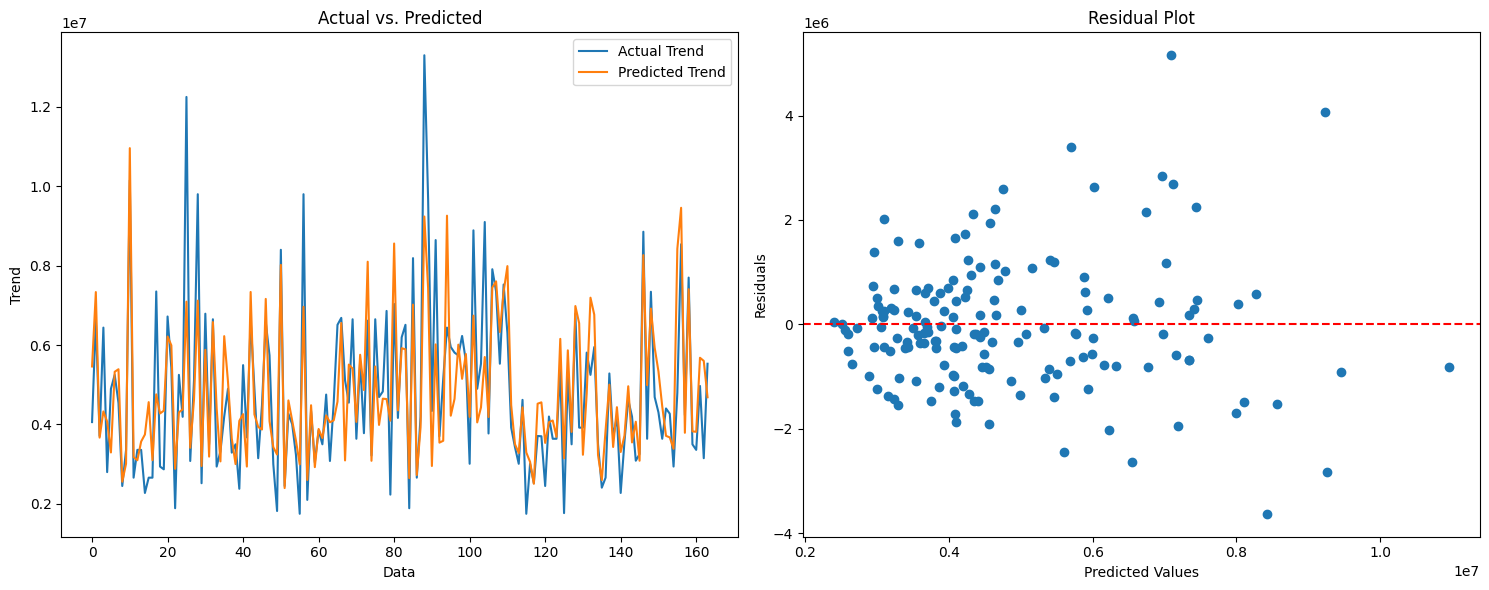

In [31]:
acc= {}
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

In [32]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

,Accuracy
Random Forest Regressor,0.565127
Gradient Boost Regressor,0.625404
XGBoost,0.615472
XGRF Regressor,0.516562
Support Vector regressor,-0.036173
Lasso Reg,0.646335
Ridge Reg,0.645793
LGBM Reg,0.627768
Cat Boost,0.644168
